(309, 4)
(309,)


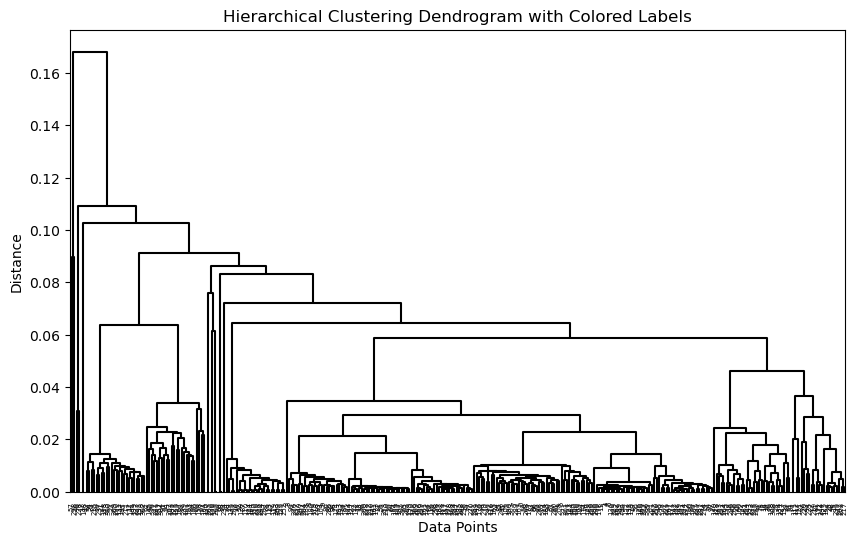

/var/folders/qt/6k9t6mfn12l30tsrj8hnl6wh0000gs/T/ipykernel_11233/1518015903.py:58: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('viridis', len(set(labels_list)))  # You can choose a different colormap


ValueError: setting an array element with a sequence.

In [18]:
import os
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Specify the directory containing your files
directory_path = "all_pd"

# Initialize the master list
master_list = []
labels_list = []  # List to store labels

# Iterate through each file in the directory
for i, filename in enumerate(os.listdir(directory_path)):
    if filename.endswith('.hist'):
        # Construct the full file path
        file_path = os.path.join(directory_path, filename)

        # Load the data from the file
        data = np.loadtxt(file_path)

        # Extract the second column into a list and append to the master list
        second_column = data[:, 1].tolist()
        master_list.append(second_column)

        # Assign labels based on the condition
        label = (i // 25) % 13 + 1
        labels_list.append(label)

# Convert the master list to a NumPy array
master_array = np.array(master_list)
labels_list.pop()

# Perform hierarchical clustering
linkage_matrix = linkage(master_array, method='average')  # You can choose a different method
print(np.shape(linkage_matrix))
print(np.shape(labels_list))
# Function to get color based on labels
def get_color(label):
    color_map = plt.cm.get_cmap('viridis', len(set(labels_list)))  # You can choose a different colormap
    return color_map(label - 1)  # Adjust label values if needed

# Function to apply colors based on labels
def link_color_func(x):
    if x < len(labels_list):
        label = labels_list[x]
        return get_color(label)
    return 'black'  # Default color for out-of-range indices
# Plot the dendrogram with colored labels
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, orientation='top', link_color_func=link_color_func)
plt.title('Hierarchical Clustering Dendrogram with Colored Labels')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()
